# Circular Arc Airfoils for XFoil Tests

After reading through a Master's Thesis that explored thin airfoils defined by a BSpline curve, I decided to adapt the technique presented and build a circular arc airfoil routine that will generate airfoils with an arbitrary camber and thickness. XFoil cannot deal with super thin airfoils, and the Thesis added a round leading edge and a parabolic thickness distribution at the trailing edge. Both of these additions helped XFoil converge on solutions during analysis.

In this note, we will build the basic routines needed to build the Python class. At the end of the note, we will import the new class and run tests on a sample airfoil so we can compare results with the data we have already presented.

## Airfoil Basics

The airfoils we will produce are normalized to a chord of length one. The camber will be specified as a percentage of this chord, as will be the thickness used in analysis. These two data items can fully define the circular arc that will form the camber line. 

In [15]:
import math

In [16]:
chord = 1.0      # includes rounded nose
camber = 5.0     # percentage of chord
thickness = 1.0  # percentage of chord

t = thickness / 100.0
c = camber / 100.0
ch = chord - t/2.0   # shorten the chord to allow for the round nose

radius = ch**2 / (8.0*c) + c/2
theta = 2*math.atan(2*c/ch)
xc = t/2 + ch/2
yc = c - radius
print(radius, theta*180/math.pi, xc, yc)

2.5000625 11.478196996179214 0.5025 -2.4500625


In [17]:
print(radius - radius * math.cos(theta))

0.050000000000000266


In [18]:
print(2 * radius * math.sin(theta))

0.9950000000000001


In [19]:
nx = 125
sweep = 2 * theta
da = sweep/nx
r = t/2
xu = []
xm = []
xl = []
yu = []
ym = []
yl = []
aa = r/25 - r
cc = r

for i in range(nx+1):  
    angle = theta - i * da
    x = xc - radius * math.sin(angle)
    y = yc + radius * math.cos(angle)
    if i > nx-5:
        j = nx - 5 - i
        xx = j*0.2
        tt = aa*xx**2 + cc
    else:
        tt = r
    dx = tt * math.sin(angle)
    dy = tt * math.cos(angle)
    xu.append(x - dx)
    xm.append(x)
    xl.append(x + dx)
    yu.append(y + dy)
    ym.append(y)
    yl.append(y - dy)

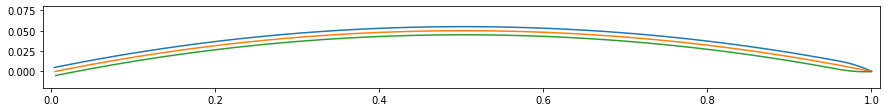

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,1.5))
plt.xlim(-0.01, 1.01)
plt.ylim(-0.02, 0.08)
plt.plot(xu,yu)
plt.plot(xm,ym)
plt.plot(xl,yl)
plt.show()

## Leading edge

In [21]:
maxLEangle = 12
nptot = round(180/maxLEangle)
np1 = round(((math.pi/2 - theta) / math.pi) * nptot)
np2 = round(((math.pi/2 + theta) / math.pi) * nptot)
print(nptot, np1, np2)

15 7 8


In [22]:
# generate top LE points
alpha = math.pi/2 + theta
dalpha = (math.pi/2 - theta)/np1
xule = []
yule = []
xlle = []
ylle = []

x = xm[0]
y = ym[0]

for i in range(np1+1):
    xule.append(x + r * math.cos(alpha))
    yule.append(y + r * math.sin(alpha))
    alpha += dalpha

# generate bottom LE points
alpha = 3*math.pi/2 + theta
dalpha = (math.pi/2 + theta)/np2
for i in range(np2+1):
    xlle.append(x + r * math.cos(alpha))
    ylle.append(y + r * math.sin(alpha))
    alpha -= dalpha

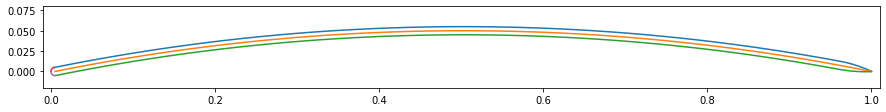

In [23]:
plt.figure(figsize=(15,1.5))
plt.xlim(-0.01, 1.01)
plt.ylim(-0.02, 0.08)
plt.plot(xu,yu)
plt.plot(xm,ym)
plt.plot(xl,yl)
plt.plot(xule,yule)
plt.plot(xlle,ylle)
plt.show()

In [24]:
polar = """ -4.000  -0.1516   0.07432   0.03929  -0.0304
-2.000  -0.1349   0.06277   0.02930  -0.0260
0.000   0.2128   0.06014   0.01681  -0.0889
2.000   0.4230   0.06382   0.01235  -0.0893
4.000   0.5911   0.06995   0.01786  -0.0846
6.000   0.7400   0.07981   0.03185  -0.0794
8.000   0.7988   0.10643   0.06473  -0.0909
10.000   0.8202   0.14239   0.10479  -0.1116
12.000   0.8773   0.17397   0.14703  -0.1282
14.000   0.9462   0.20389   0.19439  -0.1441
16.000   1.0182   0.23320   0.24733  -0.1601"""

In [25]:
A = []
CL = []
CD = []
CDp = []
CM = []
lines = polar.split('\n')
for l in lines:
    print(l)
    
    a,cl,cd,cdp,cm = l.split()
    A.append(float(a))
    CL.append(float(cl))
    CD.append(float(cd))
    CDp.append(float(cdp))
    CM.append(float(cm))
    
print(A,CL,CD,CDp,CM)

 -4.000  -0.1516   0.07432   0.03929  -0.0304
-2.000  -0.1349   0.06277   0.02930  -0.0260
0.000   0.2128   0.06014   0.01681  -0.0889
2.000   0.4230   0.06382   0.01235  -0.0893
4.000   0.5911   0.06995   0.01786  -0.0846
6.000   0.7400   0.07981   0.03185  -0.0794
8.000   0.7988   0.10643   0.06473  -0.0909
10.000   0.8202   0.14239   0.10479  -0.1116
12.000   0.8773   0.17397   0.14703  -0.1282
14.000   0.9462   0.20389   0.19439  -0.1441
16.000   1.0182   0.23320   0.24733  -0.1601
[-4.0, -2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0] [-0.1516, -0.1349, 0.2128, 0.423, 0.5911, 0.74, 0.7988, 0.8202, 0.8773, 0.9462, 1.0182] [0.07432, 0.06277, 0.06014, 0.06382, 0.06995, 0.07981, 0.10643, 0.14239, 0.17397, 0.20389, 0.2332] [0.03929, 0.0293, 0.01681, 0.01235, 0.01786, 0.03185, 0.06473, 0.10479, 0.14703, 0.19439, 0.24733] [-0.0304, -0.026, -0.0889, -0.0893, -0.0846, -0.0794, -0.0909, -0.1116, -0.1282, -0.1441, -0.1601]


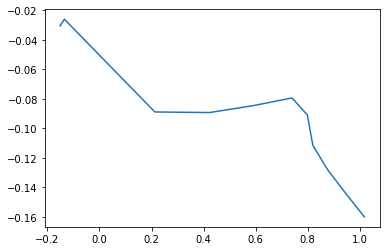

In [32]:
plt.plot(CL,CM)
plt.show()